In [13]:
import numpy as np
import matplotlib.pyplot as plt

import torch

%matplotlib inline
torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [69]:
num_samples = 1000
anom_prop = 0.1
num_anom = int(anom_prop * num_samples)
num_norm_1 = int((num_samples - num_anom)/2.0)
num_norm_2 = num_samples - (num_anom + num_norm_1)
print('Cluster 1 size: {}'.format(num_norm_1))
print('Cluster 2 size: {}'.format(num_norm_2))
print('Anomaly size: {}'.format(num_anom))

Cluster 1 size: 450
Cluster 2 size: 450
Anomaly size: 100


In [70]:
mu_1 = torch.tensor([2.1, 2.4])
mu_2 = torch.tensor([5.4, 2.2])
mu_3 = torch.tensor([5.7, 8.9])
var_1 = torch.tensor([0.2, 0.8])
var_2 = torch.tensor([0.75, 0.5])
var_3 = torch.tensor([0.6, 0.8])

In [71]:
def sample(mu, var, nb_samples=500):
    """
    Return a tensor of (nb_samples, features), sampled
    from the parameterized gaussian.
    :param mu: torch.Tensor of the means
    :param var: torch.Tensor of variances (NOTE: zero covars.)
    """
    out = []
    for i in range(nb_samples):
        out += [
            torch.normal(mu, var.sqrt())
        ]
    return torch.stack(out, dim=0)

In [72]:
c_1 = sample(mu_1, var_1, num_norm_1)
c_2 = sample(mu_2, var_2, num_norm_2)
c_3 = sample(mu_3, var_3, num_anom)

In [73]:
def plot_2d_sample(sample):
    sample_np = sample.numpy()
    x = sample_np[:, 0]
    y = sample_np[:, 1]
    plt.scatter(x, y)

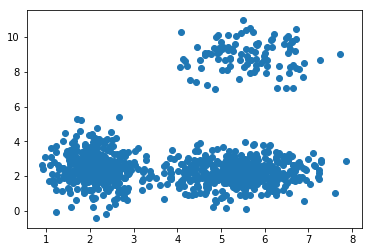

In [74]:
# create the dummy dataset, by combining the clusters.
X = torch.cat([c_1, c_2, c_3])
plot_2d_sample(X)